#      DTs  -   RF  -   SVM

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
data = pd.read_csv('D:/ML/DataSets/train.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [144]:
data.shape

(2000, 21)

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [146]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [147]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Figure size 720x720 with 0 Axes>

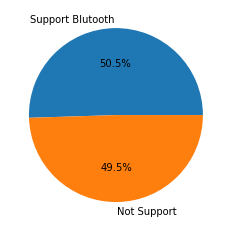

In [148]:
plt.figure(figsize=(10,10))
labels = ['Support Blutooth', 'Not Support']
sizes =  data['blue'].value_counts().values
g, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

<Figure size 720x720 with 0 Axes>

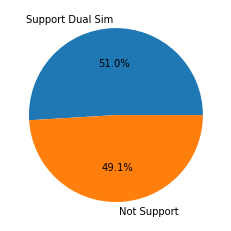

In [149]:
plt.figure(figsize=(10,10))
labels = ['Support Dual Sim', 'Not Support']
sizes =  data['dual_sim'].value_counts().values
g, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

<Figure size 720x720 with 0 Axes>

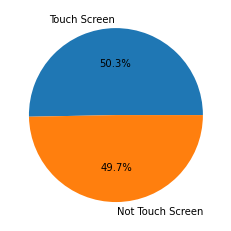

In [150]:
plt.figure(figsize=(10,10))
labels = ['Touch Screen', 'Not Touch Screen']
sizes =  data['touch_screen'].value_counts().values
g, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

<Figure size 720x720 with 0 Axes>

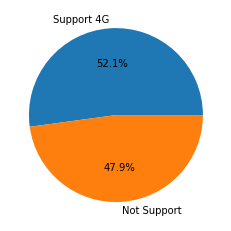

In [151]:
plt.figure(figsize=(10,10))
labels = ['Support 4G', 'Not Support']
sizes =  data['four_g'].value_counts().values
g, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

<Figure size 720x720 with 0 Axes>

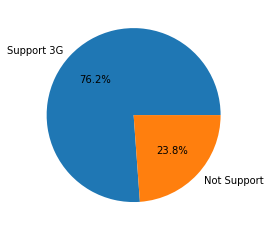

In [152]:
plt.figure(figsize=(10,10))
labels = ['Support 3G', 'Not Support']
sizes =  data['three_g'].value_counts().values
g, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

<Figure size 720x720 with 0 Axes>

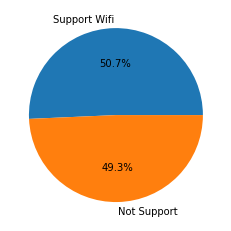

In [153]:
plt.figure(figsize=(10,10))
labels = ['Support Wifi', 'Not Support']
sizes =  data['wifi'].value_counts().values
g, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

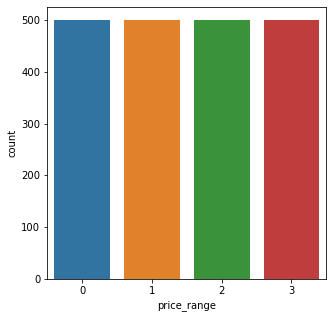

In [154]:
plt.figure(figsize=(5,5))
sns.countplot(x = data['price_range'], data = data)
plt.show()

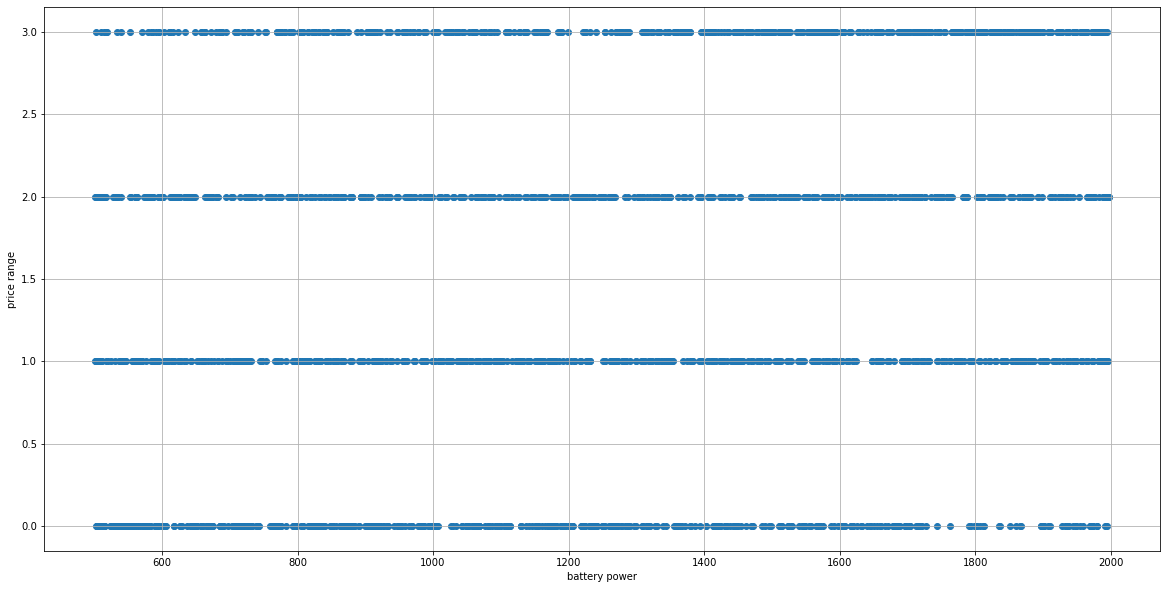

In [155]:
plt.figure(figsize=(20,10))
plt.scatter(data['battery_power'], data['price_range'])
plt.xlabel('battery power')
plt.ylabel('price range')
plt.grid()
plt.show()

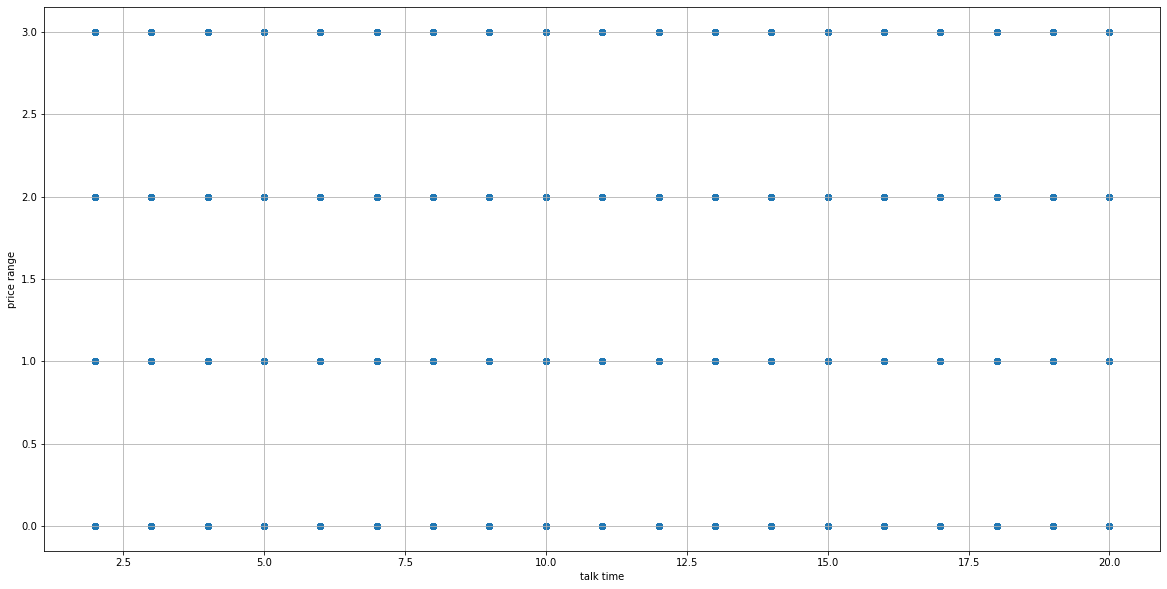

In [156]:
plt.figure(figsize=(20,10))
plt.scatter(data['talk_time'], data['price_range'])
plt.xlabel('talk time')
plt.ylabel('price range')
plt.grid()
plt.show()

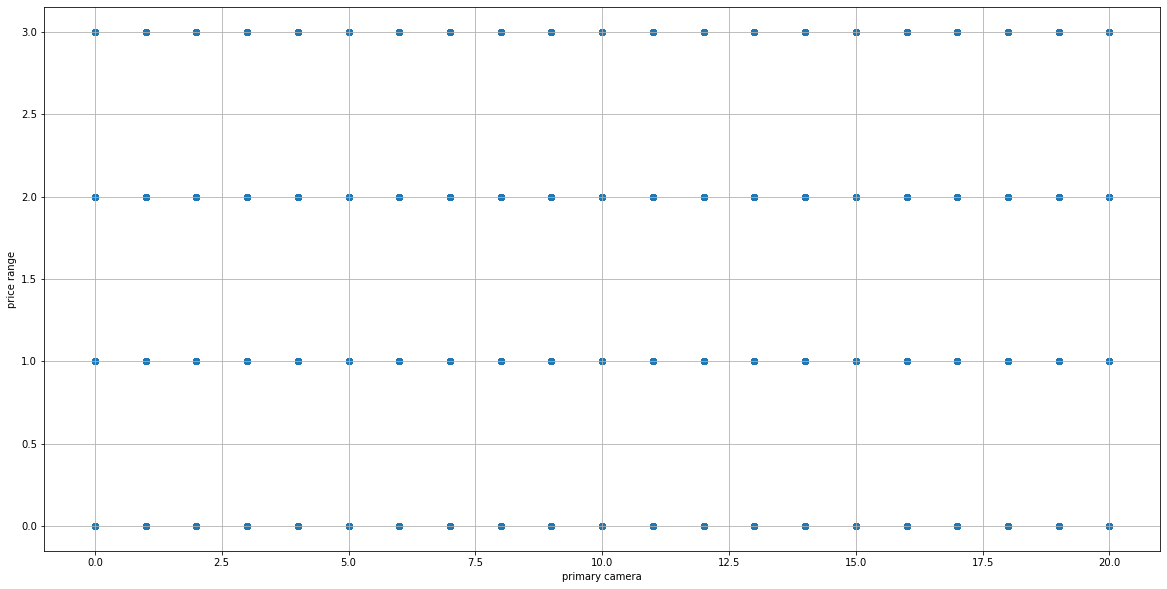

In [157]:
plt.figure(figsize=(20,10))
plt.scatter(data['pc'], data['price_range'])
plt.xlabel('primary camera')
plt.ylabel('price range')
plt.grid()
plt.show()

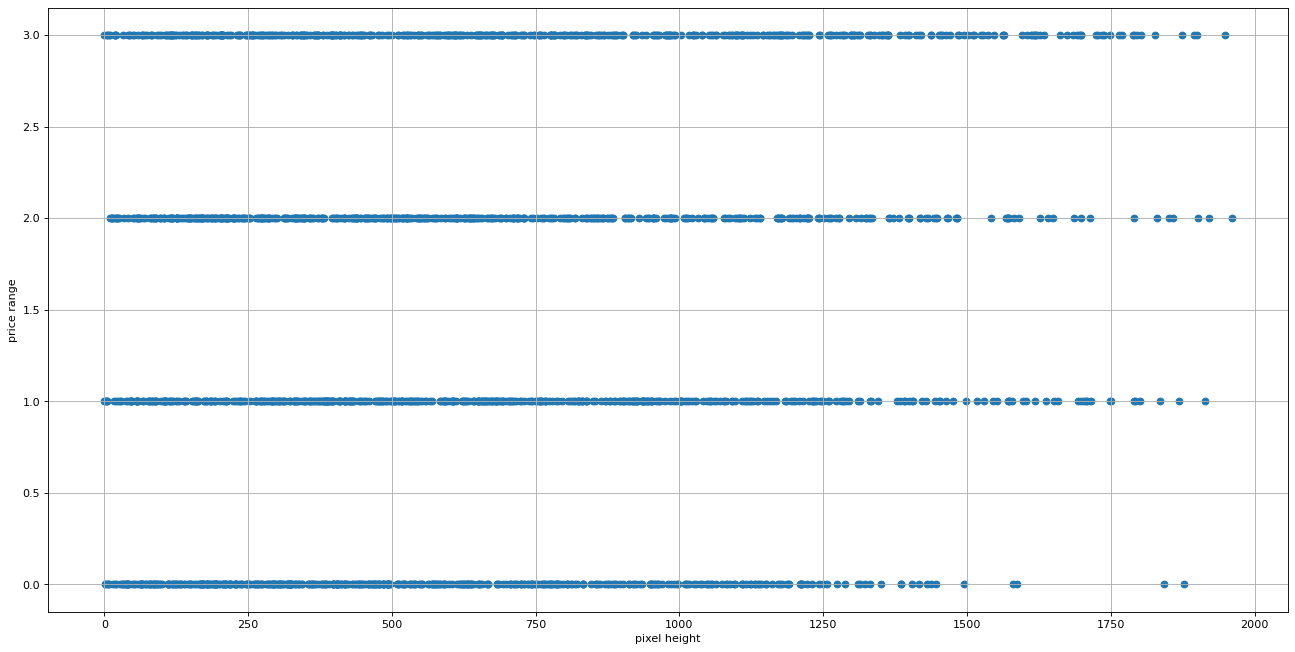

In [158]:
plt.figure(figsize=(20,10),dpi=80)
plt.scatter(data['px_height'], data['price_range'])
plt.xlabel('pixel height')
plt.ylabel('price range')
plt.grid()
plt.show()

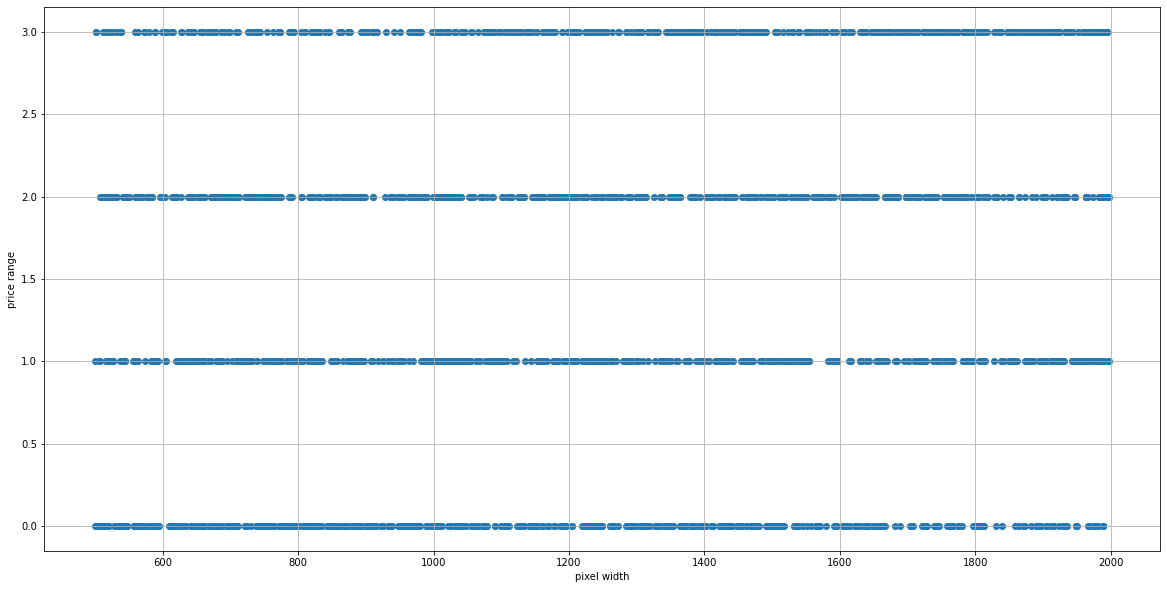

In [159]:
plt.figure(figsize=(20,10))
plt.scatter(data['px_width'], data['price_range'])
plt.xlabel('pixel width')
plt.ylabel('price range')
plt.grid()
plt.show()

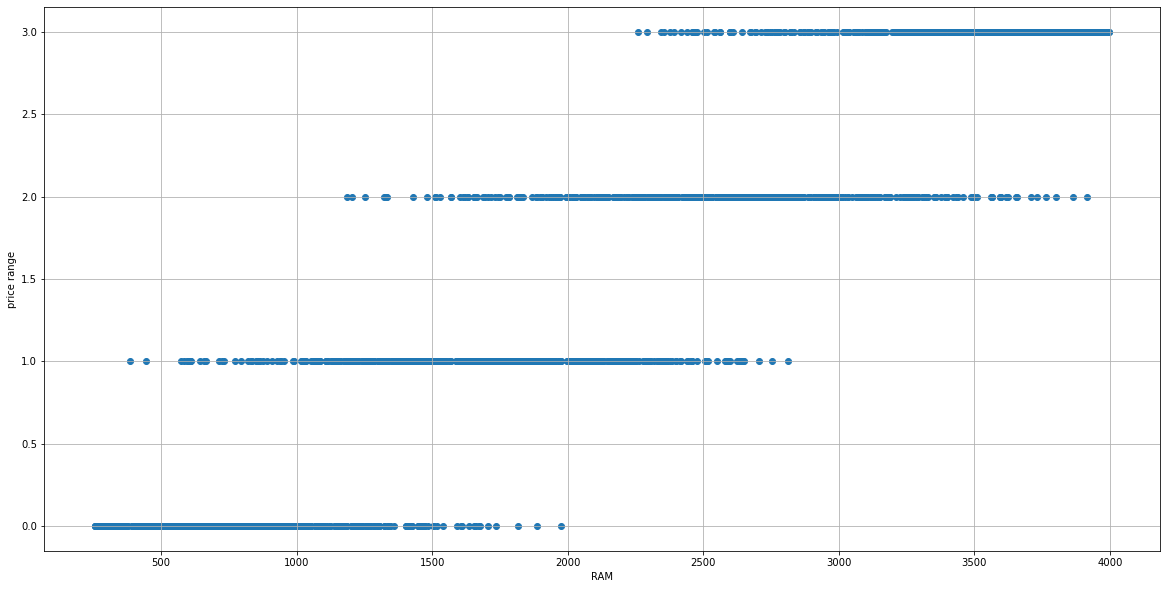

In [160]:
plt.figure(figsize=(20,10))
plt.scatter(data['ram'], data['price_range'])
plt.xlabel('RAM')
plt.ylabel('price range')
plt.grid()
plt.show()

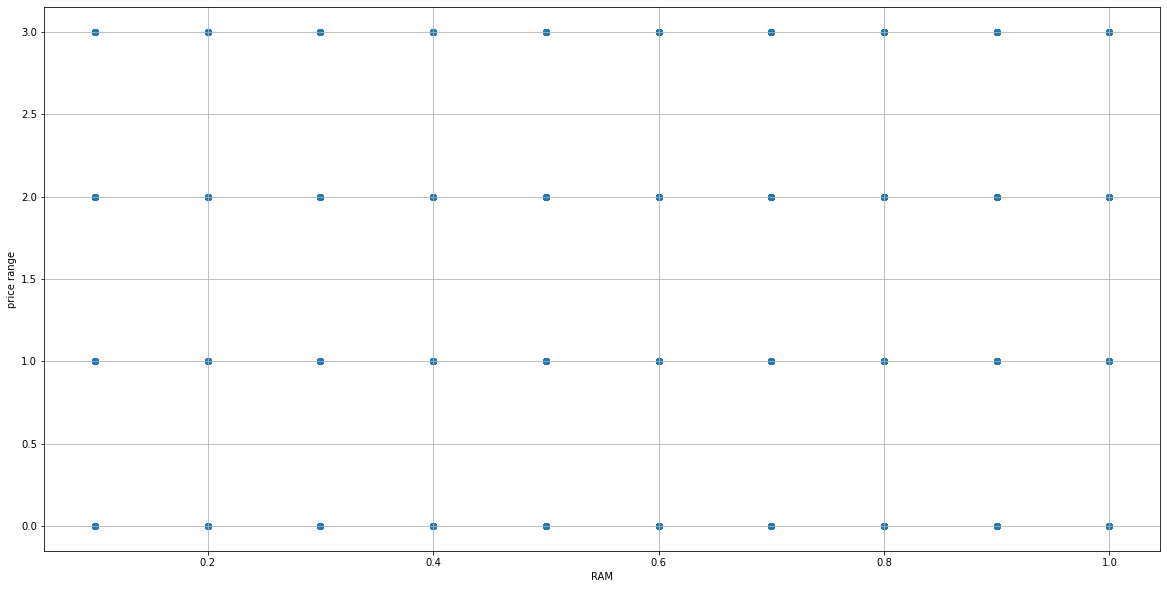

In [161]:
plt.figure(figsize=(20,10))
plt.scatter(data['m_dep'], data['price_range'])
plt.xlabel('RAM')
plt.ylabel('price range')
plt.grid()
plt.show()

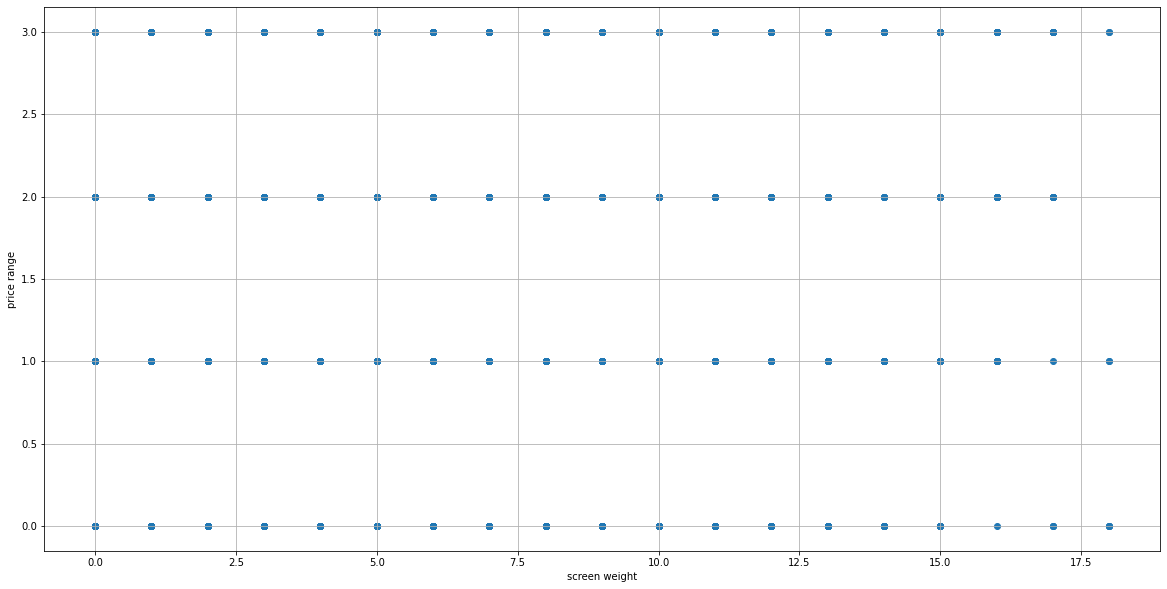

In [162]:
plt.figure(figsize=(20,10))
plt.scatter(data['sc_w'], data['price_range'])
plt.xlabel('screen weight')
plt.ylabel('price range')
plt.grid()
plt.show()

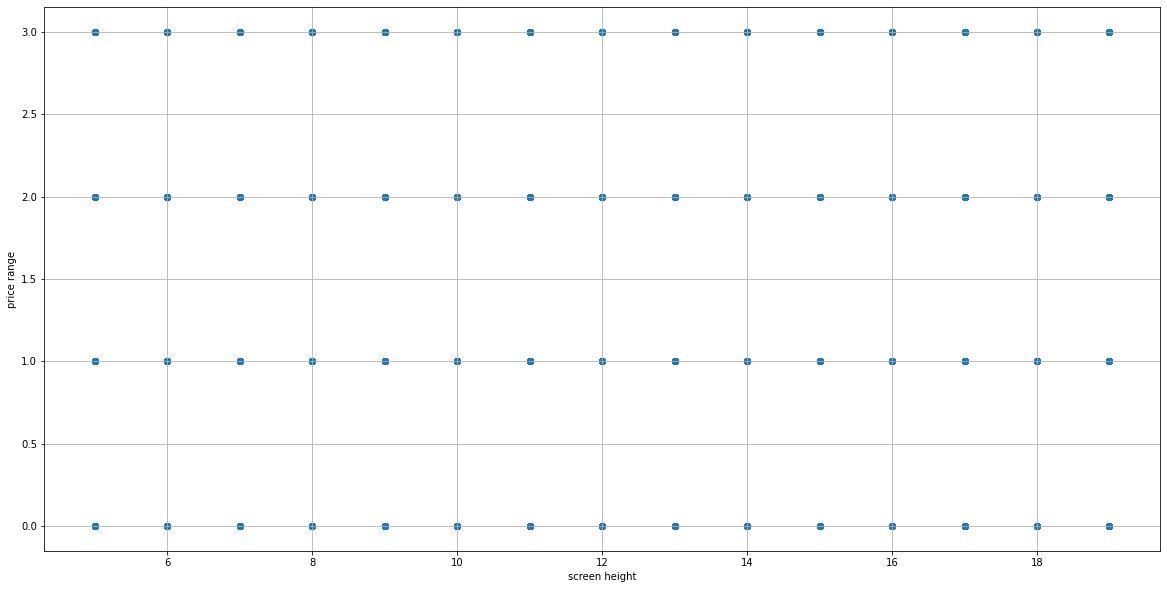

In [163]:
plt.figure(figsize=(20,10))
plt.scatter(data['sc_h'], data['price_range'])
plt.xlabel('screen height')
plt.ylabel('price range')
plt.grid()
plt.show()

In [164]:
#  Show all columns of data set
pd.set_option('display.max_columns',None) 
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


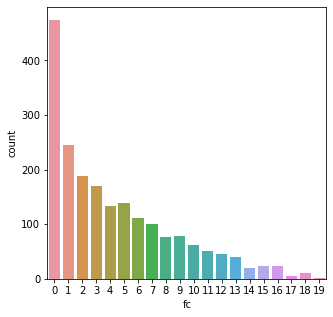

In [165]:
plt.figure(figsize=(5,5))
sns.countplot(x = data['fc'], data = data)
plt.show()

# Noises 

###   ( Pixel Height <= 0 )   and   ( Screen Width <= 0 )

In [166]:
data = data[data['px_height'] > 0]
data.reset_index(drop=True, inplace=True)

In [167]:
data = data[data['sc_w'] > 0]
data.reset_index(drop=True, inplace=True)

# Modeling By Decision Tree

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [169]:
X = pd.DataFrame(data.drop('price_range',axis=1)).values
y = data.price_range.values.reshape(-1,1)
X

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Gini

In [171]:
dt = DecisionTreeClassifier(max_depth=7)
dt

DecisionTreeClassifier(max_depth=7)

In [172]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred

array([3, 2, 2, 0, 2, 0, 1, 1, 3, 0, 2, 1, 1, 3, 3, 1, 0, 2, 3, 2, 1, 0,
       1, 3, 0, 0, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 3, 1, 1, 2, 3, 2, 2, 3,
       2, 0, 2, 3, 2, 1, 2, 1, 2, 0, 3, 0, 3, 1, 0, 1, 3, 2, 0, 3, 3, 2,
       2, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 1, 3, 2, 1, 1, 3, 1, 2, 1, 2,
       3, 3, 2, 1, 2, 0, 3, 0, 3, 3, 2, 0, 2, 0, 2, 2, 0, 1, 0, 1, 3, 1,
       2, 1, 1, 0, 2, 0, 1, 3, 1, 2, 2, 2, 1, 2, 1, 3, 0, 0, 3, 2, 0, 0,
       2, 3, 2, 0, 0, 1, 2, 1, 1, 0, 2, 3, 1, 1, 3, 2, 2, 1, 3, 3, 1, 3,
       0, 1, 0, 0, 3, 3, 0, 0, 1, 0, 1, 3, 3, 2, 3, 3, 2, 1, 1, 1, 2, 3,
       0, 1, 0, 0, 0, 2, 1, 2, 3, 1, 3, 2, 0, 3, 0, 2, 0, 0, 2, 3, 0, 3,
       0, 2, 2, 3, 0, 0, 3, 1, 1, 0, 3, 2, 2, 1, 3, 0, 0, 3, 3, 1, 1, 1,
       3, 0, 0, 2, 0, 3, 2, 0, 1, 1, 3, 2, 1, 1, 1, 0, 3, 1, 3, 3, 0, 0,
       2, 0, 2, 0, 3, 2, 1, 2, 0, 0, 1, 0, 0, 2, 3, 1, 1, 0, 1, 2, 2, 0,
       0, 2, 2, 3, 3, 1, 0, 1, 3, 2, 0, 3, 0, 1, 2, 0, 1, 0, 2, 3, 0, 0,
       2, 3, 0, 2, 1, 3, 3, 3, 1, 2, 3, 1, 1, 1, 0,

# Accuracy

In [173]:
print ('Accuracy: ', metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.8681318681318682


# Plot tree with plot_tree

In [174]:
from sklearn import tree

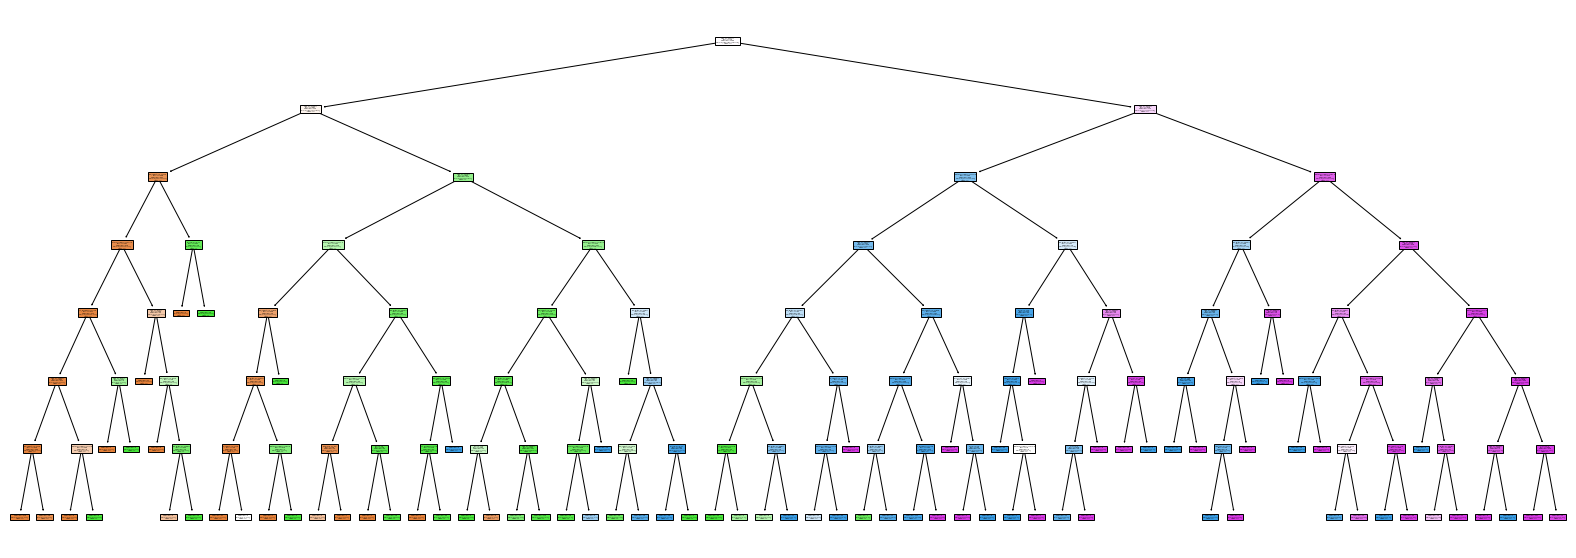

In [175]:
features = ['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory',
            'm_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w',
            'talk_time','three_g','touch_screen','wifi']

target = ['0','1','2','3']
fig = plt.figure(figsize=(28,10))
plot= tree.plot_tree(dt,
                     feature_names= features,
                     class_names= target,
                     filled=True)
# fig.savefig("tree1.png")

# Entopy

In [176]:
dte = DecisionTreeClassifier(criterion="entropy", max_depth= 6)
dte.fit(X_train, y_train)
y_pred = dte.predict(X_test)

In [177]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8379120879120879


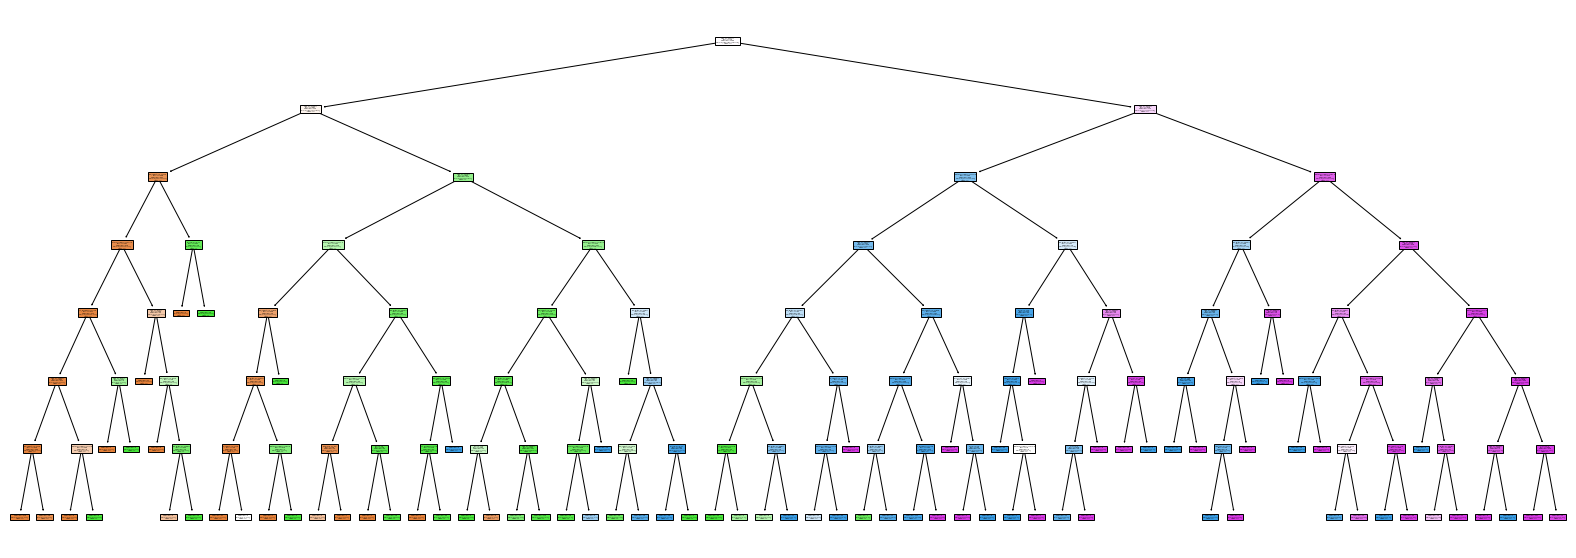

In [178]:
features = ['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory',
            'm_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w',
            'talk_time','three_g','touch_screen','wifi']

target = ['0','1','2','3']
fig = plt.figure(figsize=(28,10))
plot= tree.plot_tree(dt,
                     feature_names= features,
                     class_names= target,
                     filled=True)

# Modeling By Random Forest

In [179]:
from sklearn.ensemble import RandomForestClassifier

In [180]:
X = pd.DataFrame(data.drop('price_range',axis=1))
y = data.price_range.values.reshape(-1,1)
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1815,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1816,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1817,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [182]:
# n_estimators = The number of trees in the forest by defult is 100

rf = RandomForestClassifier(n_estimators=100, max_depth=11)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred

C:\Users\client\AppData\Local\Temp\ipykernel_832\1570503053.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


array([3, 3, 2, 0, 2, 0, 1, 1, 3, 0, 2, 1, 2, 3, 3, 1, 0, 2, 2, 1, 0, 0,
       1, 3, 1, 0, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 3, 1, 2, 2, 3, 2, 2, 3,
       3, 0, 2, 3, 2, 1, 2, 2, 2, 0, 3, 0, 3, 1, 0, 1, 3, 1, 0, 3, 3, 2,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 2, 2, 2, 1, 3, 3, 1, 1, 3, 1, 2, 1, 2,
       3, 3, 2, 1, 1, 1, 3, 0, 3, 3, 2, 0, 1, 0, 2, 2, 0, 1, 0, 1, 3, 1,
       2, 1, 1, 0, 3, 0, 1, 3, 1, 1, 2, 2, 1, 2, 1, 3, 0, 0, 3, 2, 0, 0,
       2, 3, 2, 0, 0, 1, 2, 1, 1, 0, 2, 3, 1, 1, 3, 2, 2, 2, 3, 3, 1, 3,
       0, 2, 0, 0, 3, 3, 0, 0, 1, 0, 1, 3, 3, 2, 3, 3, 2, 1, 1, 1, 1, 3,
       0, 2, 0, 0, 0, 2, 1, 2, 3, 1, 3, 2, 0, 3, 0, 2, 0, 1, 2, 3, 0, 2,
       0, 3, 2, 3, 0, 0, 3, 1, 1, 0, 2, 2, 2, 1, 3, 0, 0, 3, 3, 1, 1, 1,
       3, 0, 0, 2, 0, 3, 2, 0, 2, 1, 3, 3, 1, 1, 0, 0, 3, 0, 3, 3, 0, 0,
       2, 0, 2, 0, 3, 3, 1, 1, 0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 2, 1, 1,
       0, 2, 2, 3, 3, 1, 0, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 0, 2, 3, 0, 0,
       2, 3, 0, 2, 1, 3, 3, 3, 1, 2, 3, 1, 1, 1, 0,

In [183]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8791208791208791


# Modeling By SVM (support vector machine)

In [184]:
from sklearn.svm import SVC

In [185]:
X = pd.DataFrame(data.drop('price_range',axis=1))
y = data.price_range.values.reshape(-1,1)

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [187]:
svc = SVC(C=.1, kernel='linear', gamma=1)
svc.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, gamma=1, kernel='linear')

In [188]:
prediction = svc.predict(X_test)

In [189]:
print('Accuracy: ', metrics.accuracy_score(y_test, prediction))

Accuracy:  0.9752747252747253


#  Predict Test Dataset

In [190]:
test_dataset= pd.read_csv('D:/ML/DataSets/test.csv')
test_dataset

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [191]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [192]:
test_dataset.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [193]:
test_dataset = test_dataset[test_dataset['px_height'] > 0]
test_dataset = test_dataset[test_dataset['sc_w'] > 0]
test_dataset.reset_index(drop=True, inplace=True)

test_dataset

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
2,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
3,6,1464,1,2.9,1,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1
4,7,1718,0,2.4,0,1,0,47,1.0,156,2,3,1283,1374,3873,14,2,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,995,936,1,1.4,1,0,0,46,0.8,139,2,0,265,886,684,8,5,12,1,1,1
882,996,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
883,997,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
884,999,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [194]:
test_dataset.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [195]:
test_dataset = test_dataset.drop('id',axis=1)

In [196]:
pred_test_data_set = svc.predict(test_dataset)
pred_test_data_set

array([3, 2, 1, 3, 3, 1, 3, 3, 3, 0, 2, 0, 2, 1, 3, 1, 3, 1, 3, 0, 2, 0,
       3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 1, 1, 2, 0, 0, 1, 3, 1, 2, 1, 0, 0,
       3, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 0,
       3, 3, 0, 3, 0, 3, 1, 3, 1, 2, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2,
       0, 1, 2, 3, 3, 3, 1, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2,
       2, 2, 2, 1, 3, 1, 1, 3, 1, 2, 1, 3, 3, 3, 2, 3, 2, 3, 1, 0, 2, 3,
       3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2,
       1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2, 3, 3, 1, 2, 2,
       2, 3, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3, 2, 3, 1, 0, 1, 0,
       3, 0, 1, 0, 2, 2, 1, 3, 3, 0, 3, 1, 2, 0, 0, 1, 3, 3, 1, 1, 3, 0,
       0, 2, 3, 1, 3, 1, 1, 3, 1, 2, 3, 3, 1, 0, 1, 3, 1, 1, 3, 2, 1, 0,
       1, 2, 1, 0, 3, 2, 3, 3, 2, 1, 3, 3, 2, 3, 1, 1, 2, 0, 2, 3, 1, 0,
       0, 3, 0, 3, 0, 1, 2, 0, 2, 3, 1, 3, 2, 2, 1, 2, 0, 0, 1, 3, 2, 0,
       0, 0, 3, 0, 2, 3, 1, 2, 2, 2, 1, 3, 3, 2, 2,

In [197]:
test_dataset['Price_range'] = pred_test_data_set

In [198]:
test_dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,3
1,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,2
2,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,1
3,1464,1,2.9,1,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1,3
4,1718,0,2.4,0,1,0,47,1.0,156,2,3,1283,1374,3873,14,2,10,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,936,1,1.4,1,0,0,46,0.8,139,2,0,265,886,684,8,5,12,1,1,1,0
882,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0,2
883,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1,1
884,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0,2
